In [107]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
import time
import threading
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [108]:
# Pulling CSVs for each game
df_cod = pd.read_csv('Data/combined_twitchtracker_cod_clean.csv')
df_fortnite = pd.read_csv('Data/combined_twitchtracker_fortnite_clean.csv')
df_lol = pd.read_csv('Data/combined_twitchtracker_lol_clean.csv')
df_csgo = pd.read_csv('Data/combined_twitchtracker_csgo_clean.csv')
df_amongus = pd.read_csv('Data/combined_twitchtracker_amongus_clean.csv')

In [83]:
df_cod = pd.read_csv('Data/combined_twitchtracker_cod_clean.csv')
def cleandate(df):
    for index, row in df.iterrows():
        x = row['Month'].split('-')
        newmonth = f'{x[1]}-{x[0]}'
        df.at[index,'Month'] = newmonth
        
    return df
df_cod_clean = cleandate(df_cod)
df_cod_clean

,Month,Average_Stream,Gain_Stream,% Gain_Stream,Peak_Stream,Average_Views,Gain_Views,% Gain_Views,Peak_Views,Value,Gain_Hours,% Gain_Hours
0,Oct-20,8700.0,-230,-2.60%,22100.0,102000.0,-462,-0.50%,403000.0,"56,400,000","-17,400,000",-23.60%
1,Sep-20,8900.0,-189,-2.10%,17400.0,103000.0,"-10,619",-9.40%,364000.0,"73,800,000","-10,300,000",-12.30%
2,Aug-20,9100.0,377,4.30%,32000.0,113000.0,"-4,921",-4.20%,974000.0,"84,200,000","-3,630,000",-4.10%
3,Jul-20,8700.0,"1,170",15.50%,16600.0,118000.0,"-2,347",-1.90%,359000.0,"87,800,000","1,260,000",1.50%
4,Jun-20,7500.0,-345,-4.40%,13900.0,121000.0,"-2,486",-2%,403000.0,"86,500,000","-4,660,000",-5.10%
5,May-20,7900.0,181,2.40%,14800.0,123000.0,"11,598",10.40%,354000.0,"91,000,000","11,500,000",14.40%
6,Apr-20,7700.0,"1,947",33.90%,13200.0,111000.0,"-18,165",-14%,396000.0,"79,900,000","-16,400,000",-17.10%
7,Mar-20,5700.0,"4,364",316%,13900.0,130000.0,"116,659",902%,521000.0,"96,000,000","87,200,000",971%
8,Feb-20,1400.0,271,24.40%,3500.0,12900.0,804,6.60%,74800.0,"8,980,000","-46,400",-0.50%
9,Jan-20,1100.0,-200,-15.30%,2500.0,12100.0,"-11,671",-49%,85700.0,"9,002,000","-8,650,000",-48.90%


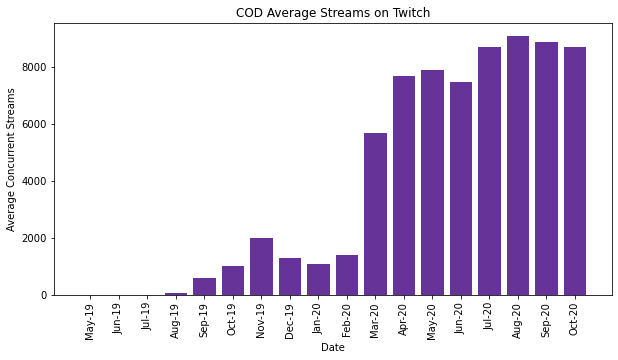

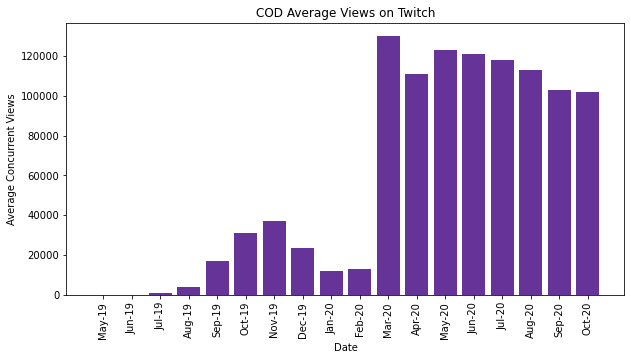

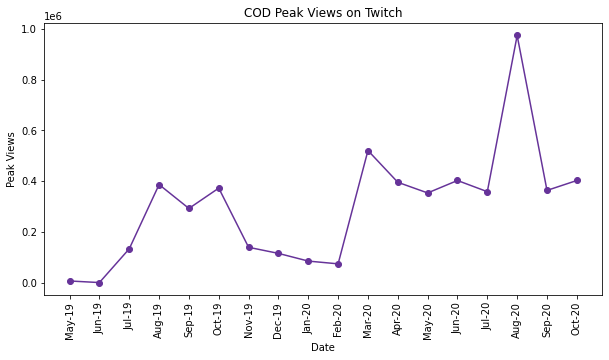

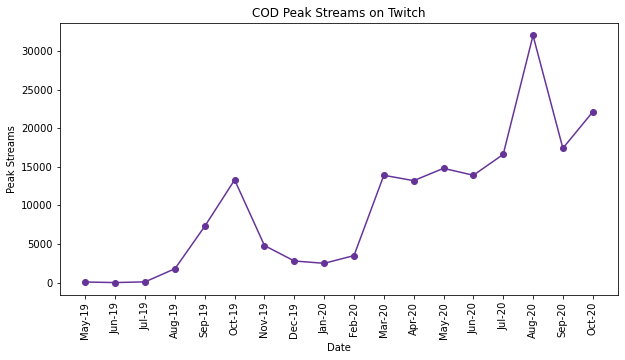

In [114]:
# Bar and Line graphs for Call of Duty: Modern Warfare
#Average Stream Bar Graph
fig_cod1, ax_cod1 = plt.subplots(figsize=(10,5))
ax_cod1.bar(df_cod_clean["Month"],df_cod_clean["Average_Stream"], color='rebeccapurple');
ax_cod1.set(xlabel = "Date", ylabel = "Average Concurrent Streams", title = "COD Average Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/COD Average Streams on Twitch.png")

# Peak Stream bar graph
fig_cod2, ax_cod2 = plt.subplots(figsize=(10,5))
ax_cod2.bar(df_cod_clean["Month"],df_cod_clean["Average_Views"], color='rebeccapurple');
ax_cod2.set(xlabel = "Date", ylabel = "Average Concurrent Views", title = "COD Average Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/COD Average Views on Twitch.png")

fig_cod3, ax_cod3 = plt.subplots(figsize=(10,5))
ax_cod3.plot(df_cod_clean["Month"],df_cod_clean["Peak_Views"], color='rebeccapurple', marker="o");
ax_cod3.set(xlabel = "Date", ylabel = "Peak Views", title = "COD Peak Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/COD Peak Views on Twitch.png")

fig_cod4, ax_cod4 = plt.subplots(figsize=(10,5))
ax_cod4.plot(df_cod_clean["Month"],df_cod_clean["Peak_Stream"], color='rebeccapurple', marker="o");
ax_cod4.set(xlabel = "Date", ylabel = "Peak Streams", title = "COD Peak Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/COD Peak Streams on Twitch.png")


In [85]:
# Creating LOL graphs
df_lol = pd.read_csv('Data/combined_twitchtracker_lol_clean.csv')
def cleandate(df):
    for index, row in df.iterrows():
        x = row['Month'].split('-')
        newmonth = f'{x[1]}-{x[0]}'
        df.at[index,'Month'] = newmonth
        
    return df
df_lol_clean = cleandate(df_lol)
df_lol_clean

,Month,Average_Stream,Gain_Stream,% Gain_Stream,Peak_Stream,Average_Views,Gain_Views,% Gain_Views,Peak_Views,Value,Gain_Hours,% Gain_Hours
0,Oct-20,4500.0,58,1.30%,8500.0,226000.0,"38,062",20.30%,1420000.0,125M,-10.4M,-7.70%
1,Sep-20,4400.0,40,0.90%,6800.0,187000.0,"-4,196",-2.20%,795000.0,135M,-7.58M,-5.30%
2,Aug-20,4400.0,-5,-0.10%,7500.0,192000.0,"9,710",5.30%,730000.0,142M,+7.25M,5.40%
3,Jul-20,4400.0,213,5.10%,7300.0,182000.0,"-16,987",-8.50%,505000.0,135M,-7.69M,-5.40%
4,Jun-20,4200.0,-566,-12%,7500.0,199000.0,"27,389",16%,561000.0,143M,+15.7M,12.40%
5,May-20,4700.0,-78,-1.60%,8300.0,172000.0,"-17,221",-9.10%,507000.0,127M,-8.03M,-5.90%
6,Apr-20,4800.0,686,16.70%,8800.0,189000.0,"22,589",13.60%,736000.0,135M,+11.8M,9.60%
7,Mar-20,4100.0,455,12.40%,8400.0,166000.0,"-8,626",-4.90%,430000.0,123M,+2.03M,1.70%
8,Feb-20,3700.0,-306,-7.70%,7300.0,175000.0,"40,802",30.40%,420000.0,121M,+21.7M,21.70%
9,Jan-20,4000.0,873,28.20%,8000.0,134000.0,"28,209",26.70%,348000.0,99.7M,+21.2M,27%


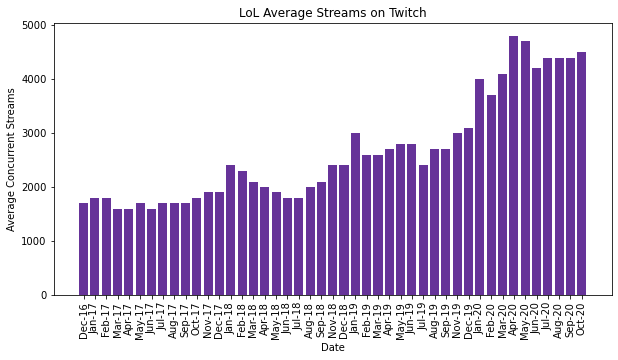

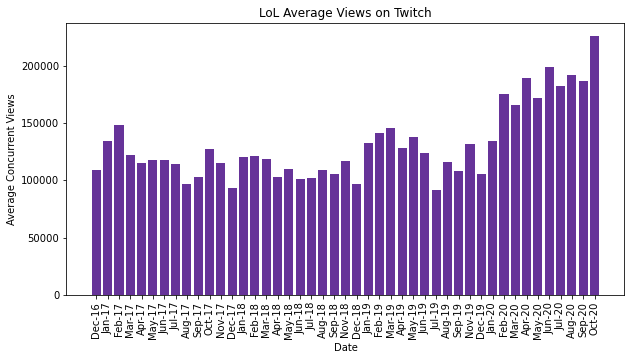

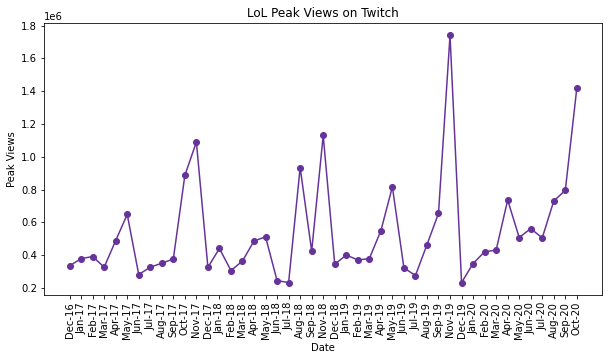

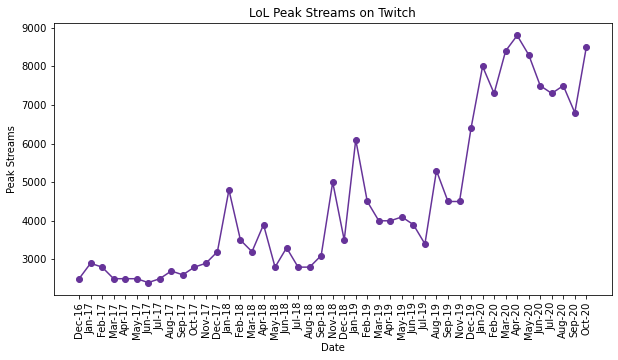

In [115]:
# Bar and Line graphs for League of Legends
#Average Stream Bar Graph
fig_lol1, ax_lol1 = plt.subplots(figsize=(10,5))
ax_lol1.bar(df_lol_clean["Month"],df_lol_clean["Average_Stream"], color='rebeccapurple');
ax_lol1.set(xlabel = "Date", ylabel = "Average Concurrent Streams", title = "LoL Average Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/LoL Average Streams on Twitch.png")

# Peak Stream bar graph
fig_lol2, ax_lol2 = plt.subplots(figsize=(10,5))
ax_lol2.bar(df_lol_clean["Month"],df_lol_clean["Average_Views"], color='rebeccapurple');
ax_lol2.set(xlabel = "Date", ylabel = "Average Concurrent Views", title = "LoL Average Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/LoL Average Views on Twitch.png")

fig_lol3, ax_lol3 = plt.subplots(figsize=(10,5))
ax_lol3.plot(df_lol_clean["Month"],df_lol_clean["Peak_Views"], color='rebeccapurple', marker="o");
ax_lol3.set(xlabel = "Date", ylabel = "Peak Views", title = "LoL Peak Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/LoL Peak Views on Twitch.png")


fig_lol4, ax_lol4 = plt.subplots(figsize=(10,5))
ax_lol4.plot(df_lol_clean["Month"],df_lol_clean["Peak_Stream"], color='rebeccapurple', marker="o");
ax_lol4.set(xlabel = "Date", ylabel = "Peak Streams", title = "LoL Peak Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/LoL Peak Streams on Twitch.png")


In [87]:
# Creating Counter Strike graphs
df_csgo = pd.read_csv('Data/combined_twitchtracker_csgo_clean.csv')
def cleandate(df):
    for index, row in df.iterrows():
        x = row['Month'].split('-')
        newmonth = f'{x[1]}-{x[0]}'
        df.at[index,'Month'] = newmonth
        
    return df
df_csgo_clean = cleandate(df_csgo)
df_csgo_clean

,Month,Average_Stream,Gain_Stream,% Gain_Stream,Peak_Stream,Average_Views,Gain_Views,% Gain_Views,Peak_Views,Value,Gain_Hours,% Gain_Hours
0,Oct-20,1500.0,54,3.80%,2800.0,77500.0,"3,168",4.30%,439000.0,"42,800,000",-10.7M,-20%
1,Sep-20,1400.0,-9,-0.60%,2600.0,74400.0,"9,608",14.80%,311000.0,"53,500,000",+5.36M,11.10%
2,Aug-20,1400.0,-159,-9.90%,2500.0,64800.0,"8,333",14.80%,324000.0,"48,100,000",+6.21M,14.80%
3,Jul-20,1600.0,-351,-18%,3100.0,56400.0,"-49,119",-46.50%,198000.0,"41,900,000",-33.8M,-44.70%
4,Jun-20,1900.0,-449,-18.70%,4200.0,106000.0,"2,100",2%,500000.0,"75,800,000",-893K,-1.20%
5,May-20,2400.0,-354,-12.90%,4800.0,103000.0,"-17,200",-14.30%,377000.0,"76,700,000",-9.72M,-11.30%
6,Apr-20,2800.0,719,35.40%,5600.0,121000.0,"30,655",34.10%,570000.0,"86,400,000",+19.6M,29.30%
7,Mar-20,2000.0,400,24.50%,4700.0,90000.0,"18,359",25.60%,829000.0,"66,800,000",+17.1M,34.30%
8,Feb-20,1600.0,-4,-0.20%,3200.0,71600.0,"26,105",57.30%,615000.0,"49,800,000",+15.9M,46.90%
9,Jan-20,1600.0,321,24.40%,3400.0,45500.0,"-8,848",-16.30%,257000.0,"33,900,000",-6.50M,-16.10%


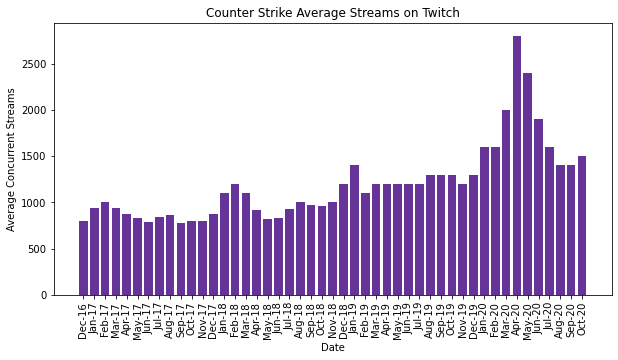

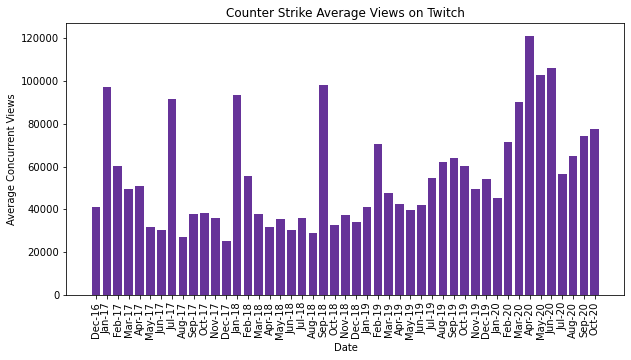

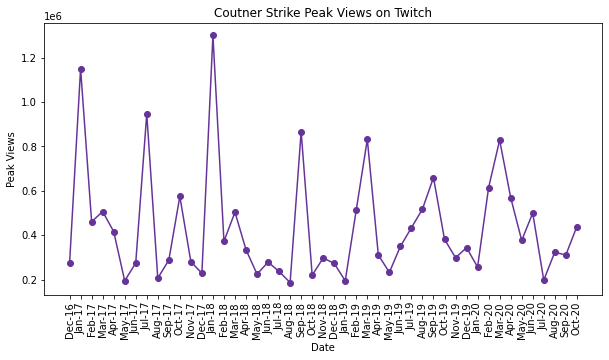

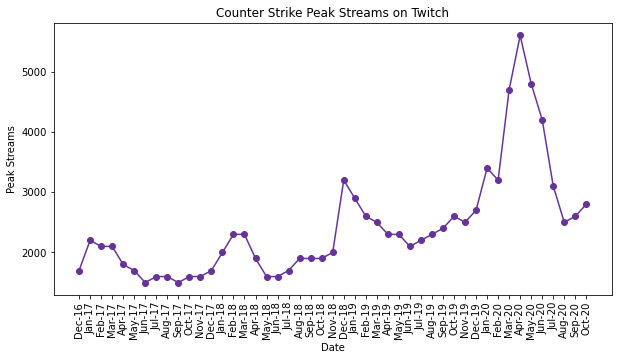

In [116]:
# Bar and Line graphs for CSGO
#Average Stream Bar Graph
fig_csgo1, ax_csgo1 = plt.subplots(figsize=(10,5))
ax_csgo1.bar(df_csgo_clean["Month"],df_csgo_clean["Average_Stream"], color='rebeccapurple');
ax_csgo1.set(xlabel = "Date", ylabel = "Average Concurrent Streams", title = "Counter Strike Average Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/CSGO Average Streams on Twitch.png")

# Peak Stream bar graph
fig_csgo2, ax_csgo2 = plt.subplots(figsize=(10,5))
ax_csgo2.bar(df_csgo_clean["Month"],df_csgo_clean["Average_Views"], color='rebeccapurple');
ax_csgo2.set(xlabel = "Date", ylabel = "Average Concurrent Views", title = "Counter Strike Average Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/CSGO Average Views on Twitch.png")

fig_csgo3, ax_csgo3 = plt.subplots(figsize=(10,5))
ax_csgo3.plot(df_csgo_clean["Month"],df_csgo_clean["Peak_Views"], color='rebeccapurple', marker="o");
ax_csgo3.set(xlabel = "Date", ylabel = "Peak Views", title = "Coutner Strike Peak Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/CSGO Peak Views on Twitch.png")


fig_csgo4, ax_csgo4 = plt.subplots(figsize=(10,5))
ax_csgo4.plot(df_csgo_clean["Month"],df_csgo_clean["Peak_Stream"], color='rebeccapurple', marker="o");
ax_csgo4.set(xlabel = "Date", ylabel = "Peak Streams", title = "Counter Strike Peak Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/CSGO Peak Streams on Twitch.png")


In [105]:
# df_fortnite
# Creating Counter Strike graphs
df_fornite = pd.read_csv('Data/combined_twitchtracker_fortnite_clean.csv')
def cleandate(df):
    for index, row in df.iterrows():
        x = row['Month'].split('-')
        newmonth = f'{x[1]}-{x[0]}'
        df.at[index,'Month'] = newmonth
        
    return df
df_fortnite_clean = cleandate(df_fortnite)
df_fortnite_clean

,Month,Average_Stream,Gain_Stream,% Gain_Stream,Peak_Stream,Average_Views,Gain_Views,% Gain_Views,Peak_Views,Value,Gain_Hours,% Gain_Hours
0,Oct-20,7700.0,"-1,048",-12%,14600.0,111000.0,3470,3.20%,355000.0,64.9M,-12.8M,-16.50%
1,Sep-20,8700.0,"-1,999",-18.70%,17200.0,108000.0,-24884,-18.70%,271000.0,77.7M,-21.1M,-21.30%
2,Aug-20,10700.0,"-1,258",-10.50%,21900.0,133000.0,-8834,-6.20%,499000.0,98.8M,-6.52M,-6.20%
3,Jul-20,12000.0,"-1,487",-11.10%,21100.0,142000.0,-13479,-8.70%,327000.0,105M,-6.15M,-5.50%
4,Jun-20,13400.0,-322,-2.30%,118000.0,155000.0,-9969,-6%,2280000.0,111M,-11.0M,-9%
5,May-20,13800.0,"3,484",33.90%,40200.0,165000.0,29538,21.80%,625000.0,122M,+25.3M,26.10%
6,Apr-20,10300.0,"3,895",61%,58400.0,136000.0,46532,52.20%,1270000.0,97.1M,+30.9M,46.80%
7,Mar-20,6400.0,670,11.70%,13000.0,89100.0,9427,11.80%,289000.0,66.2M,+10.8M,19.60%
8,Feb-20,5700.0,-197,-3.30%,11900.0,79700.0,7336,10.10%,276000.0,55.3M,+1.52M,2.80%
9,Jan-20,5900.0,727,14%,11300.0,72300.0,-14026,-16.20%,619000.0,53.8M,-10.3M,-16.10%


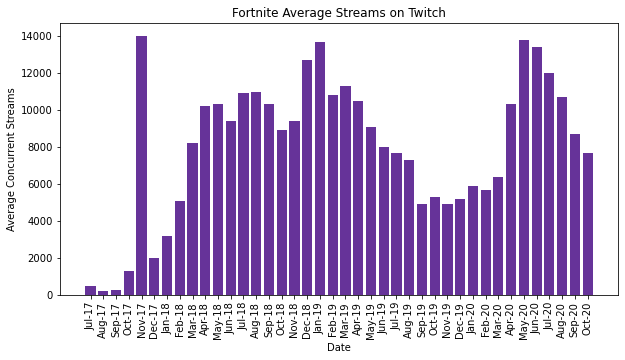

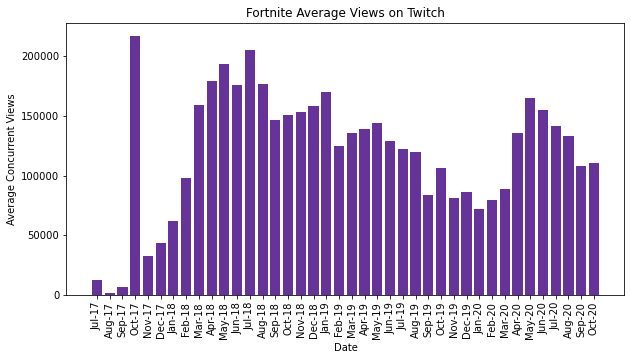

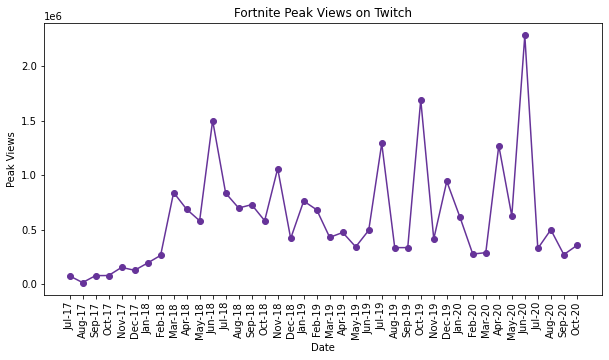

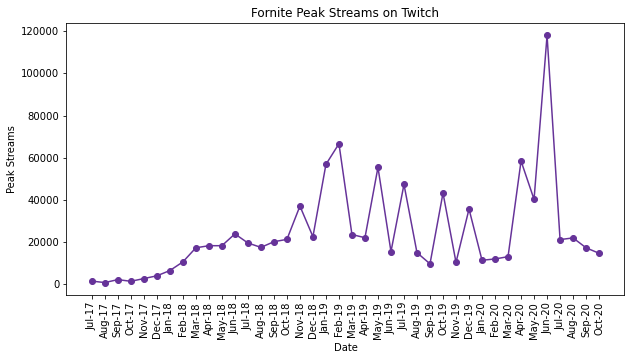

In [117]:
# Bar and Line graphs for Fornite
#Average Stream Bar Graph
fig_fortnite1, ax_fortnite1 = plt.subplots(figsize=(10,5))
ax_fortnite1.bar(df_fortnite_clean["Month"],df_fortnite_clean["Average_Stream"], color='rebeccapurple');
ax_fortnite1.set(xlabel = "Date", ylabel = "Average Concurrent Streams", title = "Fortnite Average Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/Fortnite Average Streams on Twitch.png")


# Peak Stream bar graph
fig_fortnite2, ax_fortnite2 = plt.subplots(figsize=(10,5))
ax_fortnite2.bar(df_fortnite_clean["Month"],df_fortnite_clean["Average_Views"], color='rebeccapurple');
ax_fortnite2.set(xlabel = "Date", ylabel = "Average Concurrent Views", title = "Fortnite Average Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/Fortnite Average Views on Twitch.png")

fig_fornite3, ax_fornite3 = plt.subplots(figsize=(10,5))
ax_fornite3.plot(df_fortnite_clean["Month"],df_fortnite_clean["Peak_Views"], color='rebeccapurple', marker="o");
ax_fornite3.set(xlabel = "Date", ylabel = "Peak Views", title = "Fortnite Peak Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/Fortnite Peak Views on Twitch.png")

fig_fortnite4, ax_fortnite4 = plt.subplots(figsize=(10,5))
ax_fortnite4.plot(df_fortnite_clean["Month"],df_fortnite_clean["Peak_Stream"], color='rebeccapurple', marker="o");
ax_fortnite4.set(xlabel = "Date", ylabel = "Peak Streams", title = "Fornite Peak Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/Fortnite Peak Streams on Twitch.png")

In [109]:
# Graphs for Among Us
df_amongus

,Month,Average_Views,Gain_Stream,% Gain_Stream,Peak_Views,Average_Stream,Gain_Views,% Gain_Views,Peak_Stream,Value,Gain_Hours,% Gain_Hours
0,20-Oct,151000.0,"-53,045",-26%,754000.0,3000.0,-450,-12.90%,9100.0,83.4M,-63.5M,-43.20%
1,20-Sep,204000.0,"162,989",396%,743000.0,3500.0,"2,985",598%,12400.0,147M,+116M,380%
2,20-Aug,41100.0,"35,502",629%,267000.0,499.0,445,824%,3000.0,30.6M,+26.4M,634%
3,20-Jul,5600.0,"5,473",+3.2K%,88300.0,54.0,40,286%,221.0,4.16M,+4.04M,+3.4K%
4,20-Jun,171.0,-280,-62.10%,7000.0,14.0,1,7.70%,61.0,120K,-202K,-62.70%
5,20-May,451.0,291,182%,27500.0,13.0,5,62.50%,42.0,322K,+216K,204%
6,20-Apr,160.0,42,35.60%,3800.0,8.0,3,60%,36.0,106K,+32.1K,43.60%
7,20-Mar,118.0,34,40.50%,16700.0,5.0,1,25%,22.0,73.8K,+27.8K,60.60%
8,20-Feb,84.0,6,7.70%,2400.0,4.0,2,100%,17.0,45.9K,+12.1K,35.70%
9,20-Jan,78.0,49,169%,2800.0,2.0,1,100%,11.0,33.9K,+25.6K,311%


In [111]:
# Creating Among Us graphs
df_amongus = pd.read_csv('Data/combined_twitchtracker_amongus_clean.csv')
def cleandate(df):
    for index, row in df.iterrows():
        x = row['Month'].split('-')
        newmonth = f'{x[1]}-{x[0]}'
        df.at[index,'Month'] = newmonth
        
    return df
df_amongus_clean = cleandate(df_amongus)
df_amongus_clean

,Month,Average_Views,Gain_Stream,% Gain_Stream,Peak_Views,Average_Stream,Gain_Views,% Gain_Views,Peak_Stream,Value,Gain_Hours,% Gain_Hours
0,Oct-20,151000.0,"-53,045",-26%,754000.0,3000.0,-450,-12.90%,9100.0,83.4M,-63.5M,-43.20%
1,Sep-20,204000.0,"162,989",396%,743000.0,3500.0,"2,985",598%,12400.0,147M,+116M,380%
2,Aug-20,41100.0,"35,502",629%,267000.0,499.0,445,824%,3000.0,30.6M,+26.4M,634%
3,Jul-20,5600.0,"5,473",+3.2K%,88300.0,54.0,40,286%,221.0,4.16M,+4.04M,+3.4K%
4,Jun-20,171.0,-280,-62.10%,7000.0,14.0,1,7.70%,61.0,120K,-202K,-62.70%
5,May-20,451.0,291,182%,27500.0,13.0,5,62.50%,42.0,322K,+216K,204%
6,Apr-20,160.0,42,35.60%,3800.0,8.0,3,60%,36.0,106K,+32.1K,43.60%
7,Mar-20,118.0,34,40.50%,16700.0,5.0,1,25%,22.0,73.8K,+27.8K,60.60%
8,Feb-20,84.0,6,7.70%,2400.0,4.0,2,100%,17.0,45.9K,+12.1K,35.70%
9,Jan-20,78.0,49,169%,2800.0,2.0,1,100%,11.0,33.9K,+25.6K,311%


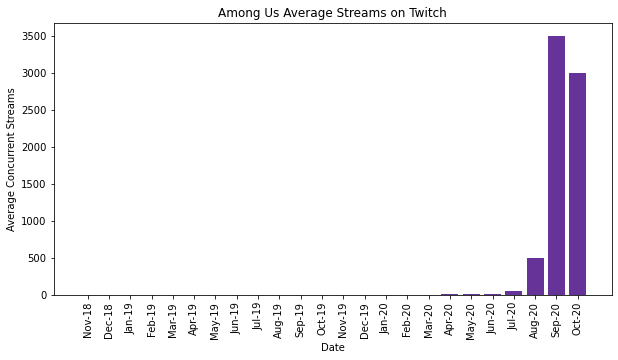

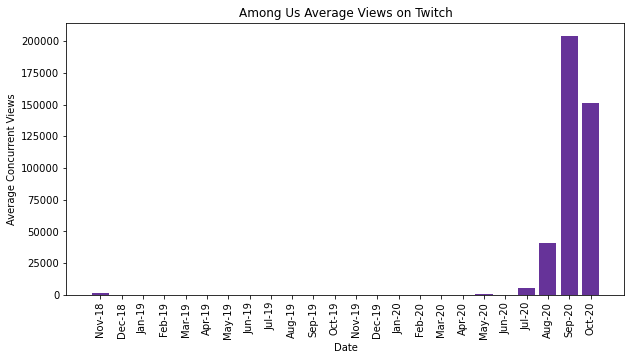

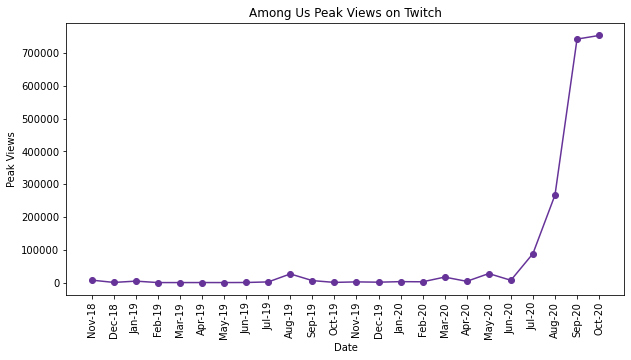

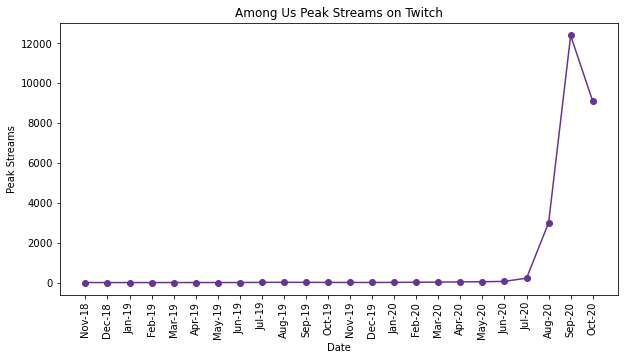

In [118]:
# Bar and Line graphs for CSGO
#Average Stream Bar Graph
fig_au1, ax_au1 = plt.subplots(figsize=(10,5))
ax_au1.bar(df_amongus_clean["Month"],df_amongus_clean["Average_Stream"], color='rebeccapurple');
ax_au1.set(xlabel = "Date", ylabel = "Average Concurrent Streams", title = "Among Us Average Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/Among Us Average Streams on Twitch.png")

# Peak Stream bar graph
fig_au2, ax_au2 = plt.subplots(figsize=(10,5))
ax_au2.bar(df_amongus_clean["Month"],df_amongus_clean["Average_Views"], color='rebeccapurple');
ax_au2.set(xlabel = "Date", ylabel = "Average Concurrent Views", title = "Among Us Average Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/Among Us Average Views on Twitch.png")

fig_au3, ax_au3 = plt.subplots(figsize=(10,5))
ax_au3.plot(df_amongus_clean["Month"],df_amongus_clean["Peak_Views"], color='rebeccapurple', marker="o");
ax_au3.set(xlabel = "Date", ylabel = "Peak Views", title = "Among Us Peak Views on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/Among Us Peak Views on Twitch.png")


fig_au4, ax_au4 = plt.subplots(figsize=(10,5))
ax_au4.plot(df_amongus_clean["Month"],df_amongus_clean["Peak_Stream"], color='rebeccapurple', marker="o");
ax_au4.set(xlabel = "Date", ylabel = "Peak Streams", title = "Among Us Peak Streams on Twitch");
plt.xticks(rotation = 'vertical')
plt.gca().invert_xaxis()
plt.savefig("Data/Among Us Peak Streams on Twitch.png")